In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

getting the data

In [ ]:
#loading csv data
covid_data = pd.read_csv('corona_tested_individuals_ver_006.english.csv')

D:\program files\Anacondafolder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


displaying sample data

In [ ]:
covid_data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [ ]:
covid_data.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other
278847,2020-03-11,0,0,0,0,0,negative,None,None,Other


In [ ]:
covid_data.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [ ]:
#viewing number of rows and columns ie shape of the dataset
covid_data.shape

(278848, 10)

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [ ]:
 #cheching for missing values
covid_data.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [ ]:
 #analysis
covid_data.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [ ]:
#distribution of  some variables
covid_data['corona_result'].value_counts()


negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

In [ ]:
#checking gender distribution
covid_data['gender'].value_counts()


female    130158
male      129127
None       19563
Name: gender, dtype: int64

In [ ]:
covid_data['head_ache'].value_counts()


0       260079
0        16354
1         2065
1          349
None         1
Name: head_ache, dtype: int64

In [ ]:
covid_data['cough'].value_counts()



0       121649
0       114719
1        25875
1        16353
None       252
Name: cough, dtype: int64

In [ ]:
covid_data['fever'].value_counts()


0       133942
0       122902
1        13582
1         8170
None       252
Name: fever, dtype: int64

data cleaning

In [ ]:
  covid_data.duplicated().sum()

272068

In [ ]:
#checking for null values or missing data
covid_data.isnull().mean()

test_date              0.0
cough                  0.0
fever                  0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
corona_result          0.0
age_60_and_above       0.0
gender                 0.0
test_indication        0.0
dtype: float64

In [ ]:
#viewing the last five values
covid_data.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other
278847,2020-03-11,0,0,0,0,0,negative,None,None,Other


In [ ]:
#checking the different type of datatypes in the cough column
covid_data['cough'].values

array([0, 1, 0, ..., '0', '0', '0'], dtype=object)

In [ ]:
#changing the data in the cough column to int data type replacing null values with integers
covid_data['cough'].value_counts()

0       121649
0       114719
1        25875
1        16353
None       252
Name: cough, dtype: int64

In [ ]:
covid_data['cough'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [ ]:
#replacing the string '0'  with integer 0
covid_data['cough'].replace('0', 0, inplace=True)

In [ ]:
covid_data['cough'].unique()


array([0, 1, '1', 'None'], dtype=object)

In [ ]:
#replacing the string '1'  with integer 1
covid_data['cough'].replace('1', 1, inplace=True)

In [ ]:
covid_data['cough'].unique()

array([0, 1, 'None'], dtype=object)

In [ ]:
#replacing the string 'None'  with integer 0
covid_data['cough'].replace('None', 0, inplace=True)

In [ ]:
covid_data['cough'].unique()

array([0, 1], dtype=int64)

In [ ]:
covid_data['cough']=covid_data['cough'].astype(int)

In [ ]:
covid_data.dtypes

test_date              object
cough                   int32
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [ ]:
covid_data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [ ]:
#cleaning tnhe fever column
covid_data['fever'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [ ]:
#replacing the string 'None'  with integer 0
covid_data['fever'].replace('None', 0, inplace=True)
covid_data['fever'].replace('0', 0, inplace=True)
covid_data['fever'].replace('1', 1, inplace=True)

In [ ]:
covid_data['fever'].unique()

array([0, 1], dtype=int64)

In [ ]:
covid_data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [ ]:
#cleaning the sore_throat column  column
covid_data['sore_throat'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [ ]:
covid_data['sore_throat'].value_counts()

0       260664
0        16257
1         1480
1          446
None         1
Name: sore_throat, dtype: int64

In [ ]:
##replacing the string 'None','1','0'  with  their respective int
covid_data['sore_throat'].replace('None', 0, inplace=True)
covid_data['sore_throat'].replace('0', 0, inplace=True)
covid_data['sore_throat'].replace('1', 1, inplace=True)

In [ ]:
covid_data['sore_throat'].unique()

array([0, 1], dtype=int64)

In [ ]:
#cleaning column shortness of breath
covid_data['shortness_of_breath'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [ ]:
#replacing the string 'None','1','0'  with  their respective int
covid_data['shortness_of_breath'].replace('None', 0, inplace=True)
covid_data['shortness_of_breath'].replace('0', 0, inplace=True)
covid_data['shortness_of_breath'].replace('1', 1, inplace=True)
covid_data['shortness_of_breath'].unique()

array([0, 1], dtype=int64)

In [ ]:
covid_data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [ ]:
#cleaning column head_ache of breath
covid_data['head_ache'].unique()
#replacing the string 'None','1','0'  with  their respective int
covid_data['head_ache'].replace('None', 0, inplace=True)
covid_data['head_ache'].replace('0', 0, inplace=True)
covid_data['head_ache'].replace('1', 1, inplace=True)
covid_data['head_ache'].unique()

array([0, 1], dtype=int64)

In [ ]:
#replacing the string 'None','1','0'  with  their respective int
covid_data['shortness_of_breath'].replace('None', 0, inplace=True)
covid_data['shortness_of_breath'].replace('0', 0, inplace=True)
covid_data['shortness_of_breath'].replace('1', 1, inplace=True)
covid_data['shortness_of_breath'].unique()

array([0, 1], dtype=int64)

In [ ]:
#cleaning column corona_result of breath
covid_data['corona_result'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
#we want to change data in this column to numerical data
#positive=1, negative =0 other= 2

In [ ]:
#replacing the string 'None','1','0'  with  their respective int
covid_data['corona_result'].replace('positive', 1, inplace=True)
covid_data['corona_result'].replace('negative', 0, inplace=True)
covid_data['corona_result'].replace('other', 2, inplace=True)
covid_data['corona_result'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:

covid_data['corona_result'].value_counts()

0    260227
1     14729
2      3892
Name: corona_result, dtype: int64

In [ ]:
#cleaning column age_60_and_above of breath
covid_data['age_60_and_above'].unique()

array(['None', 'Yes', 'No'], dtype=object)

In [ ]:
#we want to replace No and None with 0 and yes with 1

covid_data['age_60_and_above'].replace('None', 0, inplace=True)
covid_data['age_60_and_above'].replace('No', 0, inplace=True)
covid_data['age_60_and_above'].replace('Yes', 1, inplace=True)
covid_data['age_60_and_above'].unique()


array([0, 1], dtype=int64)

In [ ]:
#cleaning column gender of breath
covid_data['gender'].unique()

array(['female', 'male', 'None'], dtype=object)

In [ ]:
covid_data['gender'].value_counts()

female    130158
male      129127
None       19563
Name: gender, dtype: int64

In [ ]:

#male =1 female =0 

In [ ]:
covid_data['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [ ]:
#changing the values in tthe gender column to integers
covid_data['gender'].replace('None', 2, inplace=True)
covid_data['gender'].replace('female', 0, inplace=True)
covid_data['gender'].replace('male', 1, inplace=True)

covid_data['gender'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
#changing the values in tthetest indicator column to integer
covid_data['test_indication'].replace('Other', 2, inplace=True)
covid_data['test_indication'].replace('Abroad', 1, inplace=True)
covid_data['test_indication'].replace('Contact with confirmed', 0, inplace=True)
covid_data['test_indication'].unique()

array([2, 1, 0], dtype=int64)

In [ ]:
covid_data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,0,0,0,2
1,2020-04-30,1,0,0,0,0,0,0,0,2
2,2020-04-30,0,1,0,0,0,0,0,1,2
3,2020-04-30,1,0,0,0,0,0,0,0,2
4,2020-04-30,1,0,0,0,0,0,0,1,2


visualization

[Text(0, 0.5, 'age over sixty'),
 Text(0.5, 1.0, 'age over sixty againt corona virus')]

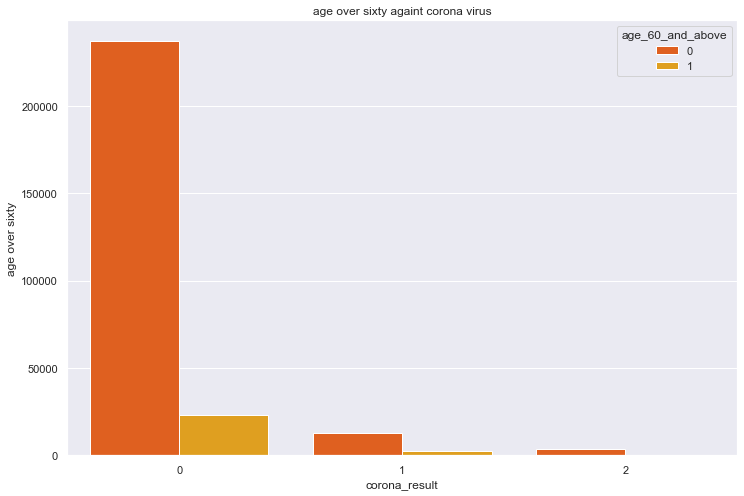

In [ ]:
sns.set(rc={'figure.figsize': (12,8)})

sns.countplot(x='corona_result',
              hue='age_60_and_above', 
              data=covid_data,
              palette='autumn').set(ylabel='age over sixty',
                                                 title='age over sixty againt corona virus')

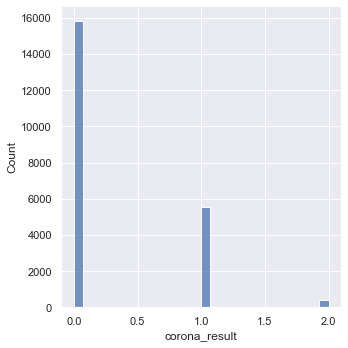

In [ ]:
sns.displot(data=covid_data.loc[covid_data['fever']==1],
           x='corona_result')

In [ ]:
covid_data.dtypes

test_date              object
cough                   int32
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result           int64
age_60_and_above        int64
gender                  int64
test_indication         int64
dtype: object

In [ ]:
covid_data['test_indication'].unique()

array([2, 1, 0], dtype=int64)

In [ ]:
covid_data['test_date'].unique()

array(['2020-04-30', '2020-04-29', '2020-04-28', '2020-04-27',
       '2020-04-26', '2020-04-25', '2020-04-24', '2020-04-23',
       '2020-04-22', '2020-04-21', '2020-04-20', '2020-04-19',
       '2020-04-18', '2020-04-17', '2020-04-16', '2020-04-15',
       '2020-04-14', '2020-04-13', '2020-04-12', '2020-04-11',
       '2020-04-10', '2020-04-09', '2020-04-08', '2020-04-07',
       '2020-04-06', '2020-04-05', '2020-04-04', '2020-04-03',
       '2020-04-02', '2020-04-01', '2020-03-31', '2020-03-30',
       '2020-03-29', '2020-03-28', '2020-03-27', '2020-03-26',
       '2020-03-25', '2020-03-24', '2020-03-23', '2020-03-22',
       '2020-03-21', '2020-03-20', '2020-03-19', '2020-03-18',
       '2020-03-17', '2020-03-16', '2020-03-15', '2020-03-14',
       '2020-03-13', '2020-03-12', '2020-03-11'], dtype=object)

In [ ]:
covid_data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,0,0,0,2
1,2020-04-30,1,0,0,0,0,0,0,0,2
2,2020-04-30,0,1,0,0,0,0,0,1,2
3,2020-04-30,1,0,0,0,0,0,0,0,2
4,2020-04-30,1,0,0,0,0,0,0,1,2


In [ ]:
#cecreating a data frame
df = pd.DataFrame(covid_data)

In [ ]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,0,0,0,2
1,2020-04-30,1,0,0,0,0,0,0,0,2
2,2020-04-30,0,1,0,0,0,0,0,1,2
3,2020-04-30,1,0,0,0,0,0,0,0,2
4,2020-04-30,1,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,0,0,2,2
278844,2020-03-11,0,0,0,0,0,0,0,2,2
278845,2020-03-11,0,0,0,0,0,1,0,2,0
278846,2020-03-11,0,0,0,0,0,2,0,2,2


In [ ]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,0,0,0,2
1,2020-04-30,1,0,0,0,0,0,0,0,2
2,2020-04-30,0,1,0,0,0,0,0,1,2
3,2020-04-30,1,0,0,0,0,0,0,0,2
4,2020-04-30,1,0,0,0,0,0,0,1,2


In [ ]:
df.dtypes

test_date              object
cough                   int32
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result           int64
age_60_and_above        int64
gender                  int64
test_indication         int64
dtype: object

In [ ]:
# we want  to  change the date column to datetime datatype then split it   into 3 discinct columns
df['test_date'].unique()

array(['2020-04-30', '2020-04-29', '2020-04-28', '2020-04-27',
       '2020-04-26', '2020-04-25', '2020-04-24', '2020-04-23',
       '2020-04-22', '2020-04-21', '2020-04-20', '2020-04-19',
       '2020-04-18', '2020-04-17', '2020-04-16', '2020-04-15',
       '2020-04-14', '2020-04-13', '2020-04-12', '2020-04-11',
       '2020-04-10', '2020-04-09', '2020-04-08', '2020-04-07',
       '2020-04-06', '2020-04-05', '2020-04-04', '2020-04-03',
       '2020-04-02', '2020-04-01', '2020-03-31', '2020-03-30',
       '2020-03-29', '2020-03-28', '2020-03-27', '2020-03-26',
       '2020-03-25', '2020-03-24', '2020-03-23', '2020-03-22',
       '2020-03-21', '2020-03-20', '2020-03-19', '2020-03-18',
       '2020-03-17', '2020-03-16', '2020-03-15', '2020-03-14',
       '2020-03-13', '2020-03-12', '2020-03-11'], dtype=object)

In [ ]:
df['test_date'] = pd.to_datetime(df['test_date'])

In [ ]:
df['test_date'].unique()

array(['2020-04-30T00:00:00.000000000', '2020-04-29T00:00:00.000000000',
       '2020-04-28T00:00:00.000000000', '2020-04-27T00:00:00.000000000',
       '2020-04-26T00:00:00.000000000', '2020-04-25T00:00:00.000000000',
       '2020-04-24T00:00:00.000000000', '2020-04-23T00:00:00.000000000',
       '2020-04-22T00:00:00.000000000', '2020-04-21T00:00:00.000000000',
       '2020-04-20T00:00:00.000000000', '2020-04-19T00:00:00.000000000',
       '2020-04-18T00:00:00.000000000', '2020-04-17T00:00:00.000000000',
       '2020-04-16T00:00:00.000000000', '2020-04-15T00:00:00.000000000',
       '2020-04-14T00:00:00.000000000', '2020-04-13T00:00:00.000000000',
       '2020-04-12T00:00:00.000000000', '2020-04-11T00:00:00.000000000',
       '2020-04-10T00:00:00.000000000', '2020-04-09T00:00:00.000000000',
       '2020-04-08T00:00:00.000000000', '2020-04-07T00:00:00.000000000',
       '2020-04-06T00:00:00.000000000', '2020-04-05T00:00:00.000000000',
       '2020-04-04T00:00:00.000000000', '2020-04-03

In [ ]:
df.dtypes

test_date              datetime64[ns]
cough                           int32
fever                           int64
sore_throat                     int64
shortness_of_breath             int64
head_ache                       int64
corona_result                   int64
age_60_and_above                int64
gender                          int64
test_indication                 int64
dtype: object

In [ ]:
#copying df
df2=df.copy()

below code splits the test_date column into several distict columns

In [ ]:
df2['year']=pd.to_datetime(df2['test_date']).dt.year

In [ ]:
df2['month']=pd.to_datetime(df2['test_date']).dt.month

In [ ]:
df2['day']=pd.to_datetime(df2['test_date']).dt.day

In [ ]:
df2['hour']=pd.to_datetime(df2['test_date']).dt.hour

In [ ]:
df2['minute']=pd.to_datetime(df2['test_date']).dt.minute

In [ ]:
df2['second']=pd.to_datetime(df2['test_date']).dt.second

In [ ]:
#checking out our new columns
df2.dtypes

test_date              datetime64[ns]
cough                           int32
fever                           int64
sore_throat                     int64
shortness_of_breath             int64
head_ache                       int64
corona_result                   int64
age_60_and_above                int64
gender                          int64
test_indication                 int64
year                            int64
month                           int64
day                             int64
hour                            int64
minute                          int64
second                          int64
dtype: object

In [ ]:
df2.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,year,month,day,hour,minute,second
0,2020-04-30,0,0,0,0,0,0,0,0,2,2020,4,30,0,0,0
1,2020-04-30,1,0,0,0,0,0,0,0,2,2020,4,30,0,0,0
2,2020-04-30,0,1,0,0,0,0,0,1,2,2020,4,30,0,0,0
3,2020-04-30,1,0,0,0,0,0,0,0,2,2020,4,30,0,0,0
4,2020-04-30,1,0,0,0,0,0,0,1,2,2020,4,30,0,0,0


 we want to drop the unecessary columns ie test_date,hour, minute, second

In [ ]:
df2.drop('test_date', axis=1, inplace=True)

In [ ]:
df2.drop('hour', axis=1, inplace=True)

In [ ]:
df2.drop('minute', axis=1, inplace=True)

In [ ]:
df2.drop('second', axis=1, inplace=True)

In [ ]:
df2.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,year,month,day
0,0,0,0,0,0,0,0,0,2,2020,4,30
1,1,0,0,0,0,0,0,0,2,2020,4,30
2,0,1,0,0,0,0,0,1,2,2020,4,30
3,1,0,0,0,0,0,0,0,2,2020,4,30
4,1,0,0,0,0,0,0,1,2,2020,4,30


In [ ]:
df2.hist

<bound method hist_frame of         cough  fever  sore_throat  shortness_of_breath  head_ache  \
0           0      0            0                    0          0   
1           1      0            0                    0          0   
2           0      1            0                    0          0   
3           1      0            0                    0          0   
4           1      0            0                    0          0   
...       ...    ...          ...                  ...        ...   
278843      0      0            0                    0          0   
278844      0      0            0                    0          0   
278845      0      0            0                    0          0   
278846      0      0            0                    0          0   
278847      0      0            0                    0          0   

        corona_result  age_60_and_above  gender  test_indication  year  month  \
0                   0                 0       0               

In [ ]:
df2.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,year,month,day
0,0,0,0,0,0,0,0,0,2,2020,4,30
1,1,0,0,0,0,0,0,0,2,2020,4,30
2,0,1,0,0,0,0,0,1,2,2020,4,30
3,1,0,0,0,0,0,0,0,2,2020,4,30
4,1,0,0,0,0,0,0,1,2,2020,4,30


rearanging columns for convenience

In [ ]:
column_names = ["year", "month", "day", "cough", "fever", "sore_throat", "head_ache", "age_60_and_above", "gender", "test_indication", "corona_result"]
df2 = df2.reindex(columns=column_names)

In [ ]:
print(df2)

        year  month  day  cough  fever  sore_throat  head_ache  \
0       2020      4   30      0      0            0          0   
1       2020      4   30      1      0            0          0   
2       2020      4   30      0      1            0          0   
3       2020      4   30      1      0            0          0   
4       2020      4   30      1      0            0          0   
...      ...    ...  ...    ...    ...          ...        ...   
278843  2020      3   11      0      0            0          0   
278844  2020      3   11      0      0            0          0   
278845  2020      3   11      0      0            0          0   
278846  2020      3   11      0      0            0          0   
278847  2020      3   11      0      0            0          0   

        age_60_and_above  gender  test_indication  corona_result  
0                      0       0                2              0  
1                      0       0                2              0  
2     

In [ ]:
df2.head()

,year,month,day,cough,fever,sore_throat,head_ache,age_60_and_above,gender,test_indication,corona_result
0,2020,4,30,0,0,0,0,0,0,2,0
1,2020,4,30,1,0,0,0,0,0,2,0
2,2020,4,30,0,1,0,0,0,1,2,0
3,2020,4,30,1,0,0,0,0,0,2,0
4,2020,4,30,1,0,0,0,0,1,2,0


re labelling the corona virus column to target for convinience

In [ ]:
df2=df2.rename(columns={"corona_result":"target"})

In [ ]:
df2.head()

,year,month,day,cough,fever,sore_throat,head_ache,age_60_and_above,gender,test_indication,target
0,2020,4,30,0,0,0,0,0,0,2,0
1,2020,4,30,1,0,0,0,0,0,2,0
2,2020,4,30,0,1,0,0,0,1,2,0
3,2020,4,30,1,0,0,0,0,0,2,0
4,2020,4,30,1,0,0,0,0,1,2,0


In [ ]:
#saving df2 data to a csv
df2.to_csv('processed_data.csv', index=False)

In [ ]:
training2=df2.copy()
#replacing the string 'None','1','0'  with  their respective int
#training2['corona_result'].replace( 1,'positive', inplace=True)
#training2['corona_result'].replace( 0,'negative', inplace=True)
#training2['corona_result'].unique
#training2.to_csv('training2.csv', index=False)

In [ ]:
training2.head()

,year,month,day,cough,fever,sore_throat,head_ache,age_60_and_above,gender,test_indication,target
0,2020,4,30,0,0,0,0,0,0,2,0
1,2020,4,30,1,0,0,0,0,0,2,0
2,2020,4,30,0,1,0,0,0,1,2,0
3,2020,4,30,1,0,0,0,0,0,2,0
4,2020,4,30,1,0,0,0,0,1,2,0


In [ ]:
training2['target'].replace(0, 'Negative', inplace=True)
training2['target'].replace(1, 'Positive', inplace=True)
training2.to_csv('training3.csv', index=False)


In [ ]:
training2.dtypes

year                 int64
month                int64
day                  int64
cough                int32
fever                int64
sore_throat          int64
head_ache            int64
age_60_and_above     int64
gender               int64
test_indication      int64
target              object
dtype: object

now we want to split our data into training and test data

In [ ]:
#first checking distribution of target
df2['target'].value_counts() 

0    260227
1     14729
2      3892
Name: target, dtype: int64

In [ ]:
#before i split the data, i want my target variable to have only two values insted of 3  i therefore wnt to drop some rows
df2=df2.loc[df2['target'] !=2]

In [ ]:
df2['target'].value_counts() 

0    260227
1     14729
Name: target, dtype: int64

In [ ]:
df2.shape

(274956, 11)

In [ ]:
#splitting 
x=df2.drop(columns='target', axis=1)
y=df2['target']

In [ ]:
print(x)

        year  month  day  cough  fever  sore_throat  head_ache  \
0       2020      4   30      0      0            0          0   
1       2020      4   30      1      0            0          0   
2       2020      4   30      0      1            0          0   
3       2020      4   30      1      0            0          0   
4       2020      4   30      1      0            0          0   
...      ...    ...  ...    ...    ...          ...        ...   
278842  2020      3   11      0      0            0          0   
278843  2020      3   11      0      0            0          0   
278844  2020      3   11      0      0            0          0   
278845  2020      3   11      0      0            0          0   
278847  2020      3   11      0      0            0          0   

        age_60_and_above  gender  test_indication  
0                      0       0                2  
1                      0       0                2  
2                      0       1                2  

In [ ]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
278842    0
278843    0
278844    0
278845    1
278847    0
Name: target, Length: 274956, dtype: int64


In [ ]:
#splitting into trainig and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(274956, 10) (219964, 10) (54992, 10)


In [ ]:
#saving training data to a csv
x_train.to_csv('training.csv', index=False)

In [ ]:
#saving testing data to a csv
x_test.to_csv('testing.csv', index=False)

model training
logistic regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training the logistic regression model with training data
model.fit(x_train, y_train)

D:\program files\Anacondafolder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluating

accuracy score 

In [ ]:
#accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.96107090251132


In [ ]:
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9613398312481816


predictive system

In [ ]:
#i have inserted testdata 
input_data = (2020,4,30,0,1,1,1,1,0,2)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)


[1]


In [ ]:
#adding an if statement to textify the output variable
if (prediction)[0]==0:
    print('the person tested covid19 negtive')
else:
    print('the person has covid19')

the person has covid19


In [ ]:
df2.to_csv('clean_covid_data.csv', index=False)

NameError: name 'df1' is not defined